In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Get the parent directory of the current file
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from audio_similarity.audio_similarity import AudioSimilarity

In [2]:
original_audio = '/audio/original'  # Load the original audio data as a numpy array
compare_audio = '/audio/compare/5.mp3'  # Load the generated audio data as a numpy array
sr = 22050

In [3]:
# Create an instance of AudioSimilarity with custom weights in dictionary (optional)
weights_dict = {
    'zcr_similarity': 0.2,
    'rhythm_similarity': 0.2,
    'chroma_similarity': 0.2,
    'spectral_contrast_similarity': 0.2,
    'perceptual_similarity': 0.2
}

weights_dict_weighted = {
    'zcr_similarity': 0.2,
    'rhythm_similarity': 0.3,
    'chroma_similarity': 0.2,
    'spectral_contrast_similarity': 0.2,
    'perceptual_similarity': 0.1
}
# Create an instance of AudioSimilarity with custom weights in list (optional)
weights_list = [0.3, 0.2, 0.15, 0.15, 0.1, 0.1]

In [4]:
audio_similarity = AudioSimilarity(original_audio, compare_audio, sr, weights_dict, verbose=True, sample_size=40)

Loading comparison files:: 100%|██████████| 1/1 [00:00<00:00, 43.95it/s]


In [5]:
# Calculate all metrics as dictionary and display in a Pandas dataframe

metric_dict = audio_similarity.stent_weighted_audio_similarity(metrics='all')
df = pd.DataFrame.from_dict(metric_dict, orient='index', columns=['Value'])
df = df.rename_axis('Metric')
df

Calculating zero crossing rate similarity...
Calculating rhythm similarity...
Calculating chroma similarity similarity...
Calculating spectral contrast similarity...
Calculating perceptual similarity...


,Value
Metric,
zcr_similarity,0.967584
rhythm_similarity,0.566661
chroma_similarity,0.769711
spectral_contrast_similarity,0.905543
perceptual_similarity,0.555906
swass,0.753081


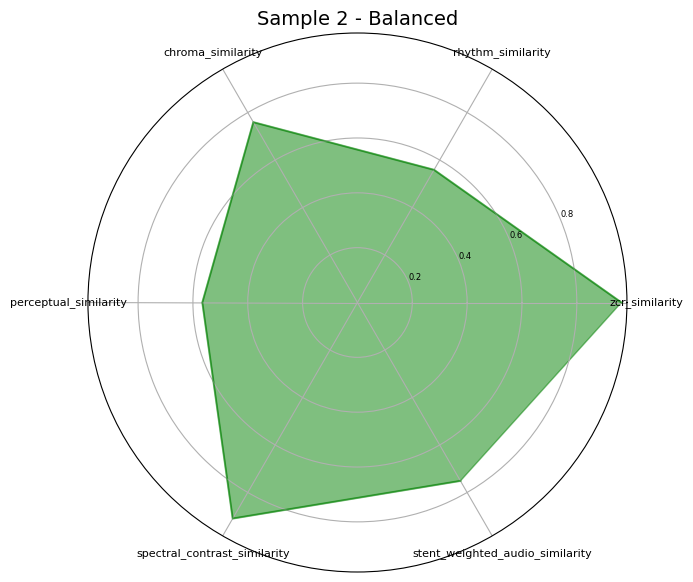

In [ ]:

audio_similarity.plot(metrics=None,
                      option='radar',
                      figsize=(10, 7),
                      color1='red',
                      color2='green',
                      dpi=100,
                      savefig=False,
                      fontsize=6,
                      label_fontsize=8,
                      title_fontsize=14, 
                      alpha=0.5, title='Sample 2 - Balanced')